# UNet starter for Steel defect detection challenge

This kernel uses a UNet model with pretrained resnet18 encoder for this challenge, with simple augmentations using albumentations library, uses BCE loss, metrics like Dice and IoU. I've used [segmentation_models.pytorch](https://github.com/qubvel/segmentation_models.pytorch) which comes with a lot pre-implemented segmentation architectures. This is a modified version of my previous [kernel](https://www.kaggle.com/rishabhiitbhu/unet-with-resnet34-encoder-pytorch) for [siim-acr-pneumothorax-segmentation](https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation/) competition.

**As internet is not allowed for this competition, I tried installing `segmentation_models.pytorch` by source using pip but due to some reasons it didn't work. So, as a [Jugaad](https://en.wikipedia.org/wiki/Jugaad) I took all of `segmentation_models.pytorch`'s UNet code and wrote it in a single file and added it as a dataset so as to use it for this kernel, its dependency [pretrained-models.pytorch](https://github.com/Cadene/pretrained-models.pytorch) is also added as a dataset.

Updates:
* V16: Bugfix in overall `dice_neg` and `dice_pos` computation

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Imports

In [ ]:
from steel_segmentation.models.unet import Unet
from steel_segmentation.models.model import *

from matplotlib import pyplot as plt

import warnings
import random
import os
import pandas as pd
import numpy as np
import torch

warnings.filterwarnings("ignore")
seed = 69
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
torch.device("cuda:0").type

'cuda'

In [ ]:
torch.cuda.is_available()

True

In [ ]:
model = Unet("resnet18", encoder_weights="imagenet", classes=4, activation=None)

In [ ]:
model_trainer = Trainer(model, num_epochs=1, lr=1e-6, save_path=models_dir/"kaggle_tmp.pth")

In [ ]:
loaded_dict = torch.load(models_dir/"kaggle_model.pth")

In [ ]:
loaded_dict.keys()

dict_keys(['epoch', 'best_loss', 'state_dict', 'optimizer'])

In [ ]:
model_trainer.net.load_state_dict(
    loaded_dict["state_dict"], strict=True)

<All keys matched successfully>

In [ ]:
model_trainer.start()

Starting epoch: 0 | phase: train | ⏰: 20:11:41


### Results

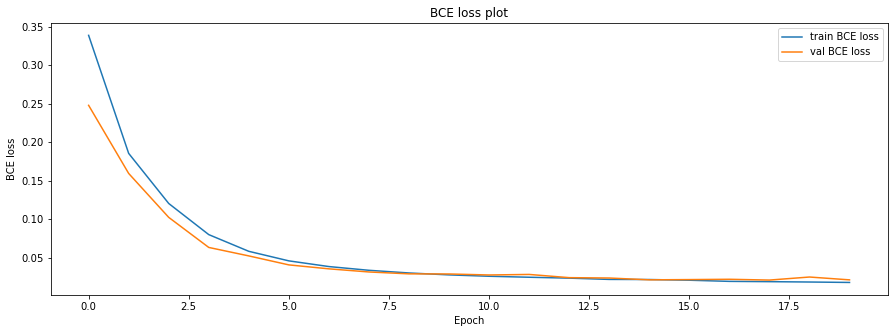

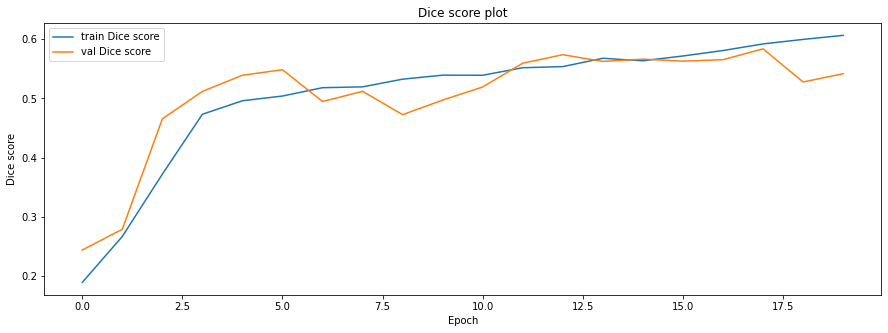

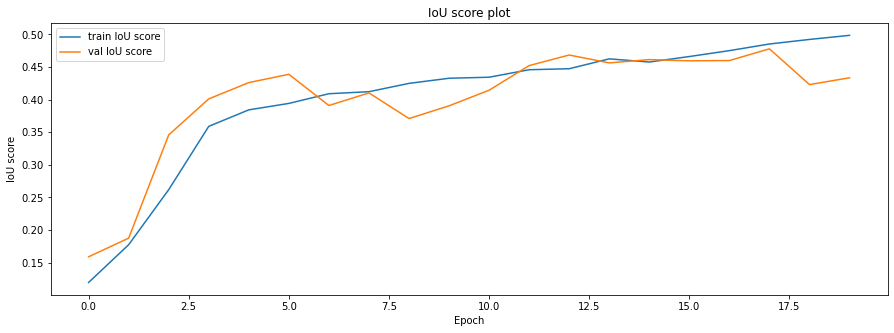

In [ ]:
# PLOT TRAINING
losses = model_trainer.losses
dice_scores = model_trainer.dice_scores # overall dice
iou_scores = model_trainer.iou_scores

def plot(scores, name):
    plt.figure(figsize=(15,5))
    plt.plot(range(len(scores["train"])), scores["train"], label=f'train {name}')
    plt.plot(range(len(scores["train"])), scores["val"], label=f'val {name}')
    plt.title(f'{name} plot'); plt.xlabel('Epoch'); plt.ylabel(f'{name}');
    plt.legend(); 
    plt.show()

plot(losses, "BCE loss")
plot(dice_scores, "Dice score")
plot(iou_scores, "IoU score")

## Test prediction and submission

This training and validation takes about ~400 minutes which exceeds Kaggle's GPU usage limit of 60 minutes, we won't be able to submit the `submission.csv` file generated from this kernel. So, for test prediction and submission I've written a separate [UNet inference kernel](https://www.kaggle.com/rishabhiitbhu/unet-pytorch-inference-kernel), make sure you add the `model.pth` file generated from this kernel as dataset to test inference kernel.

I've used resnet-18 architecture in this kernel. It scores ~0.89 on LB. Try to play around with other architectures of `segmenation_models.pytorch` and see what works best for you, let me know in the comments :) and do upvote if you liked this kernel, I need some medals too. 😬

## Refrences:

Few kernels from which I've borrowed some cod[](http://)e:

* https://www.kaggle.com/amanooo/defect-detection-starter-u-net
* https://www.kaggle.com/go1dfish/clear-mask-visualization-and-simple-eda

A big thank you to all those who share their code on Kaggle, I'm nobody without you guys. I've learnt a lot from fellow kagglers, special shout-out to [@Abhishek](https://www.kaggle.com/abhishek), [@Yury](https://www.kaggle.com/deyury), [@Heng](https://www.kaggle.com/hengck23), [@Ekhtiar](https://www.kaggle.com/ekhtiar), [@lafoss](https://www.kaggle.com/iafoss), [@Siddhartha](https://www.kaggle.com/meaninglesslives), [@xhulu](https://www.kaggle.com/xhlulu), and the list goes on..